<a href="https://colab.research.google.com/github/RutwijKulkarni03/Smart-Wardrobe/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import tensorflow
import numpy as np
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from sklearn.neighbors import NearestNeighbors
import cv2

In [ ]:
feature_list = np.array(pickle.load(open('/content/drive/MyDrive/DATASET/embeddings.pkl','rb')))
filenames = pickle.load(open('/content/drive/MyDrive/DATASET/filenames.pkl','rb'))

In [ ]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False


In [ ]:
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])


In [ ]:
img = image.load_img('/content/drive/MyDrive/DATASET/sample1.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

1/1 [==============================] - 1s 1s/step


In [ ]:
neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [ ]:
distances,indices = neighbors.kneighbors([normalized_result])

print(indices)

[[15219 16874 14971 17515 12655 15302]]


In [ ]:
# from google.colab.patches import cv2_imshow
# path = r'/content/drive/MyDrive/DATASET/sampleimg.jpg'
# image = cv2.imread(path)
# window_name = 'DATASET'
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


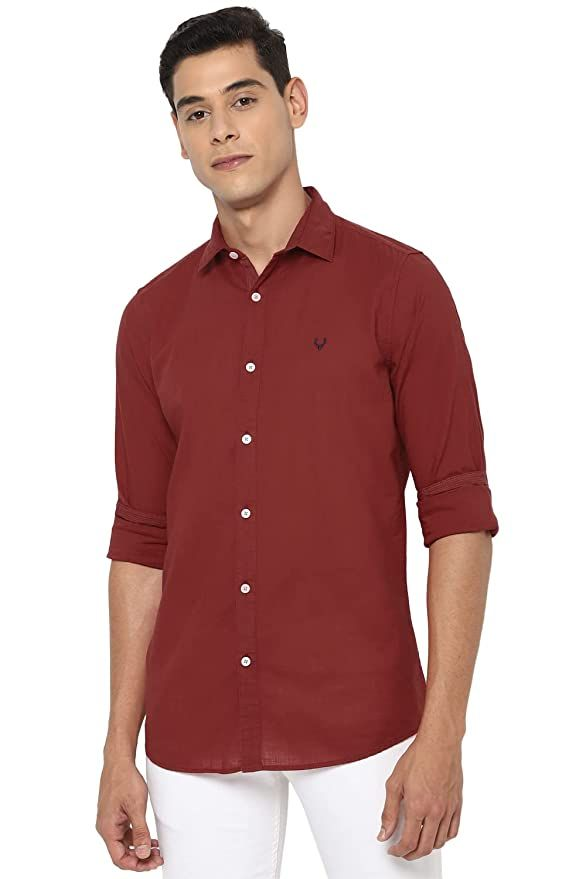

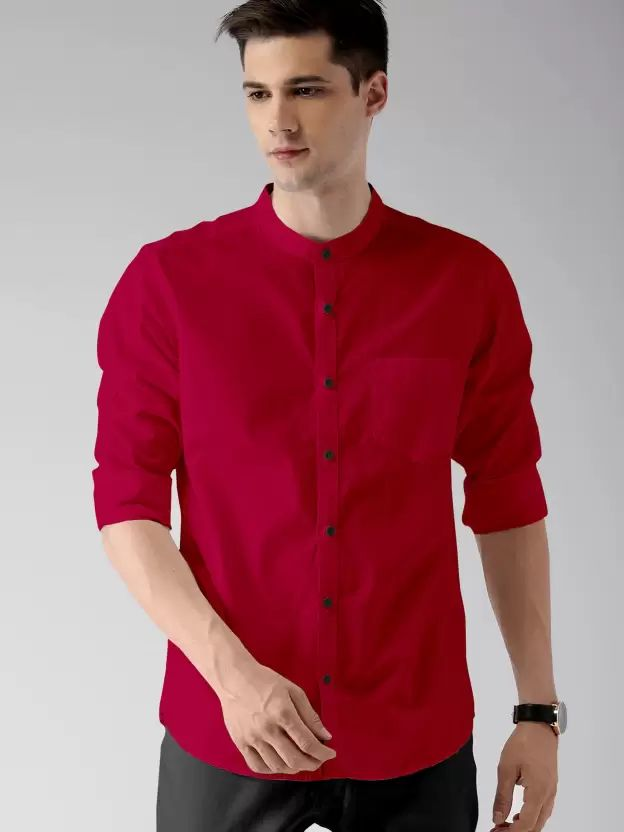

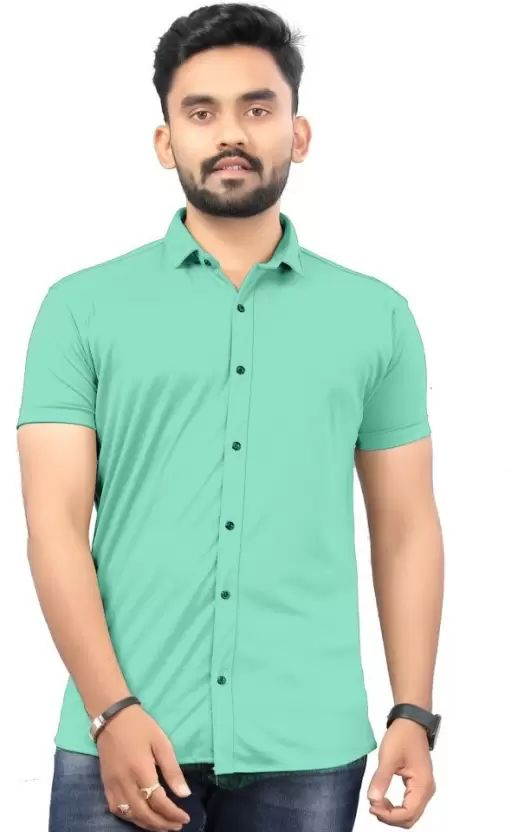

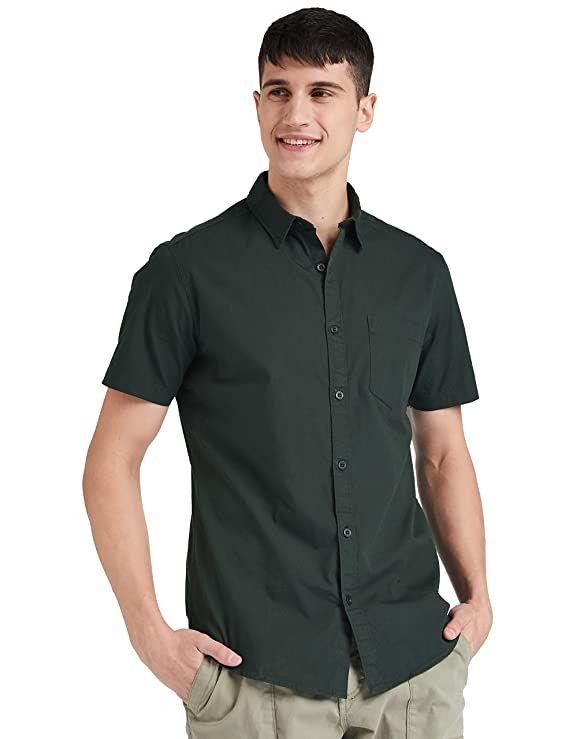

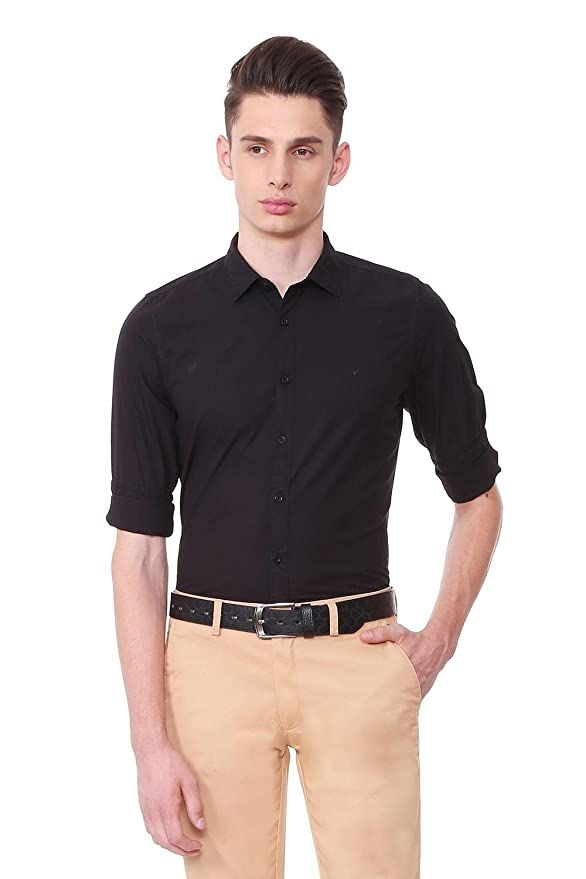

In [ ]:
from google.colab.patches import cv2_imshow
for file in indices[0][1:6]:
    temp_img = cv2.imread(filenames[file])
    cv2_imshow(temp_img)

    # cv2.imshow('output',cv2.resize(temp_img,(512,512)))
    cv2.waitKey(0)
